### **In this notebook we will map already implemented Frey & Osborne job automation risk to our ESCO database**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df_auto = pd.read_csv('drive/My Drive/ESCO/OccComp.csv', encoding='utf-16', sep='\t')
df_auto.head()

,Annual,A Mean,A Median,A Pct10,A Pct25,A Pct75,A Pct90,Computerizable Probability,Emp Prse,Hourly,H Mean,H Median,H Pct10,H Pct25,H Pct75,H Pct90,Mean Prse,Number of Records,Occ Code,Occ Group,Occ Title,Occupation1,SOC Code,Tot Emp
0,NaN,185850.0,175110.0,68600.0,111040.0,NaN,#,0.015,0.7,NaN,89.35,84.19,32.98,53.38,#,#,0.4,1,11-1011,detailed,Chief Executives,Chief Executives,11-1011,238940
1,NaN,119460.0,97730.0,44190.0,64750.0,152270.0,#,0.160,0.3,NaN,57.44,46.99,21.24,31.13,73.21,#,0.2,1,11-1021,detailed,General and Operations Managers,General and Operations Managers,11-1021,2145140
2,NaN,95810.0,62940.0,28060.0,40080.0,111370.0,#,0.240,4.4,NaN,46.06,30.26,13.49,19.27,53.54,#,5.3,1,13-1011,detailed,"Agents and Business Managers of Artists, Perfo...",Agents and Business Managers of Artists,13-1011,13230
3,NaN,62280.0,56270.0,31220.0,41690.0,75140.0,"101,180",0.870,3.5,NaN,29.94,27.05,15.01,20.04,36.12,48.65,1.8,1,13-1021,detailed,"Buyers and Purchasing Agents, Farm Products",Buyers and Purchasing Agents,13-1021,12160
4,NaN,59270.0,52940.0,30200.0,39430.0,71210.0,"95,590",0.290,1.6,NaN,28.5,25.45,14.52,18.96,34.23,45.96,0.7,1,13-1022,detailed,"Wholesale and Retail Buyers, Except Farm Products",Wholesale and Retail Buyers,13-1022,111200


In [ ]:
len(df_auto)

659

In [ ]:
df_auto = df_auto[['Occ Title', "Computerizable Probability"]]
df_auto.head()

,Occ Title,Computerizable Probability
0,Chief Executives,0.015
1,General and Operations Managers,0.160
2,"Agents and Business Managers of Artists, Perfo...",0.240
3,"Buyers and Purchasing Agents, Farm Products",0.870
4,"Wholesale and Retail Buyers, Except Farm Products",0.290


In [ ]:
df_auto.sort_values('Occ Title', inplace=True, ignore_index=True)

In [ ]:
df_auto.head()

,Occ Title,Computerizable Probability
0,Accountants and Auditors,0.94
1,Actors,0.37
2,Actuaries,0.21
3,Adhesive Bonding Machine Operators and Tenders,0.95
4,"Administrative Law Judges, Adjudicators, and H...",0.64


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
df_auto_encoded = embed(df_auto['Occ Title'])

In [ ]:
df_auto_encoded.shape

TensorShape([659, 512])

In [ ]:
import pandas as pd
df = pd.read_json("drive/My Drive/ESCO/raw_clustered_esco_job.json") #, encoding='iso-8859-1', sep='\t')
df.head()

,Job,Labels
0,3D animator,435
1,3D modeller,435
2,3D printing technician,173
3,ATM repair technician,183
4,Freinet school teacher,12


In [ ]:
esco_job_encoded = embed(df['Job'])

In [ ]:
esco_job_encoded.shape

TensorShape([2942, 512])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

job_similarity_matrix = cosine_similarity(esco_job_encoded, df_auto_encoded, dense_output=True)

In [ ]:
job_similarity_matrix.shape

(2942, 659)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


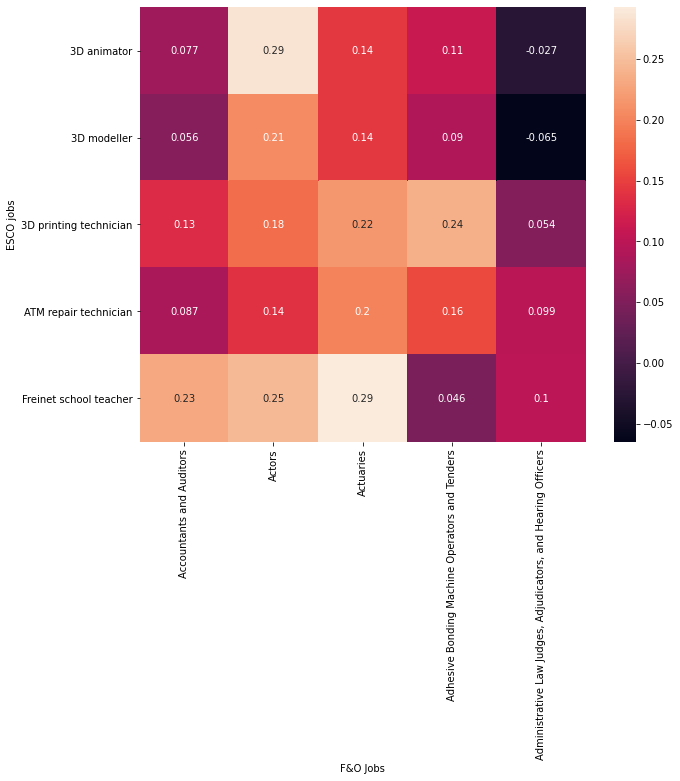

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(job_similarity_matrix[0:5, 0:5], annot=True, xticklabels=df_auto.loc[0:4]['Occ Title'], yticklabels=df.loc[0:4]['Job'])
plt.xlabel('F&O Jobs')
plt.ylabel('ESCO jobs')
plt.show()

In [ ]:
probability_index = np.argmax(job_similarity_matrix, axis=1)
probability_index.shape

(2942,)

In [ ]:
final_dat = pd.DataFrame({'Job': df['Job'],
                          'Computerisation Probability': df_auto.loc[probability_index]['Computerizable Probability'].values})

In [ ]:
final_dat.head(50)

,Job,Computerisation Probability
0,3D animator,0.0150
1,3D modeller,0.9700
2,3D printing technician,0.9700
3,ATM repair technician,0.8100
4,Freinet school teacher,0.1300
5,ICT accessibility tester,0.9900
6,ICT account manager,0.2800
7,ICT application configurator,0.0420
8,ICT application developer,0.0420
9,ICT auditor manager,0.9400


In [ ]:
final_dat.sort_values('Computerisation Probability', ascending=False, inplace=True, ignore_index=True)
final_dat

,Job,Computerisation Probability
0,import export specialist in waste and scrap,0.9900
1,data entry supervisor,0.9900
2,data entry clerk,0.9900
3,insurance underwriter,0.9900
4,dairy processing operator,0.9900
...,...,...
2937,mental health social worker,0.0031
2938,art therapist,0.0028
2939,sport therapist,0.0028
2940,alternative animal therapist,0.0028


In [ ]:
top_20 = final_dat['Job'][0:20].values.tolist()
top_20

['import export specialist in waste and scrap',
 'data entry supervisor',
 'data entry clerk',
 'insurance underwriter',
 'dairy processing operator',
 'toilet attendant',
 'customs and excise officer',
 'footwear hand sewer',
 'insurance broker',
 'bingo caller',
 'title closer',
 'insurance claims handler',
 'insurance claims manager',
 'soap chipper',
 'insurance clerk',
 'soap maker',
 'insurance collector',
 'tax policy analyst',
 'tax inspector',
 'ICT usability tester']

### **Due to the curse of Dimensionality, cosine or Eclidean distances are not a good measure for proximity or similarity, therefore lets try and reduce the dimensionality and then analyse the mapping**

In [ ]:
from sklearn.manifold import TSNE
model = TSNE(n_components=3, metric='euclidean', verbose=True)

In [ ]:
df_auto_encoded_red = model.fit_transform(df_auto_encoded)
ecsco_job_encoded_red = model.fit_transform(esco_job_encoded)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 659 samples in 0.028s...
[t-SNE] Computed neighbors for 659 samples in 0.507s...
[t-SNE] Computed conditional probabilities for sample 659 / 659
[t-SNE] Mean sigma: 0.359430
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.122070
[t-SNE] KL divergence after 1000 iterations: 1.858803
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2942 samples in 0.258s...
[t-SNE] Computed neighbors for 2942 samples in 10.506s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2942
[t-SNE] Computed conditional probabilities for sample 2000 / 2942
[t-SNE] Computed conditional probabilities for sample 2942 / 2942
[t-SNE] Mean sigma: 0.338740
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.736816
[t-SNE] KL divergence after 1000 iterations: 1.578134


In [ ]:
red_cosine_similarity = cosine_similarity(ecsco_job_encoded_red, df_auto_encoded_red, dense_output=True)

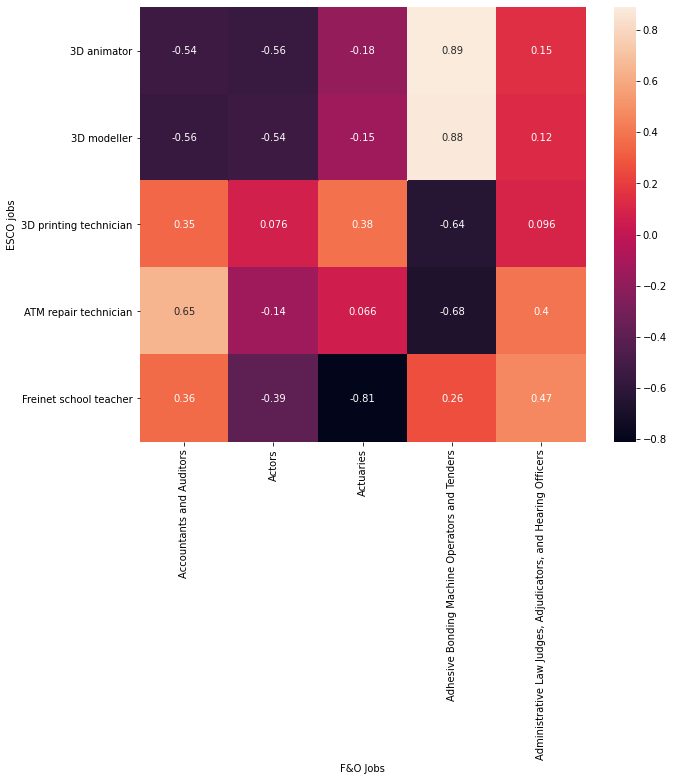

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(red_cosine_similarity[0:5, 0:5], annot=True, xticklabels=df_auto.loc[0:4]['Occ Title'], yticklabels=df.loc[0:4]['Job'])
plt.xlabel('F&O Jobs')
plt.ylabel('ESCO jobs')
plt.show()

In [ ]:
red_probability_index = np.argmax(red_cosine_similarity, axis=1)

In [ ]:
red_dat = pd.DataFrame({'Job': df['Job'],
                          'Computerisation Probability': df_auto.loc[red_probability_index]['Computerizable Probability'].values})
red_dat.sort_values('Computerisation Probability', ascending=False, inplace=True, ignore_index=True)

In [ ]:
red_dat.head(50)

,Job,Computerisation Probability
0,import export manager in textiles and textile ...,0.99
1,leather laboratory technician,0.99
2,textile colourist,0.99
3,printmaker,0.99
4,digital printer,0.99
5,green coffee buyer,0.99
6,barista,0.99
7,case administrator,0.99
8,legislative drafter,0.99
9,textile dyer,0.99


In [ ]:
original_top20 = df_auto.sort_values('Computerizable Probability', ignore_index=True, ascending=False)
original_top20 = original_top20['Occ Title'][0:20].values.tolist()
original_top20

['New Accounts Clerks',
 'Photographic Process Workers and Processing Machine Operators',
 'Insurance Underwriters',
 'Watch Repairers',
 'Data Entry Keyers',
 'Telemarketers',
 'Mathematical Technicians',
 'Title Examiners, Abstractors, and Searchers',
 'Cargo and Freight Agents',
 'Sewers, Hand',
 'Library Technicians',
 'Tax Preparers',
 'Procurement Clerks',
 'Shipping, Receiving, and Traffic Clerks',
 'Loan Officers',
 'Tellers',
 'Umpires, Referees, and Other Sports Officials',
 'Inspectors, Testers, Sorters, Samplers, and Weighers',
 'Legal Secretaries',
 'Driver/Sales Workers']

In [ ]:
df_auto.sort_values('Computerizable Probability', ignore_index=True, ascending=False)

,Occ Title,Computerizable Probability
0,New Accounts Clerks,0.9900
1,Photographic Process Workers and Processing Ma...,0.9900
2,Insurance Underwriters,0.9900
3,Watch Repairers,0.9900
4,Data Entry Keyers,0.9900
...,...,...
654,Orthotists and Prosthetists,0.0035
655,Audiologists,0.0033
656,Mental Health and Substance Abuse Social Workers,0.0031
657,"First-Line Supervisors of Mechanics, Installer...",0.0030


### **Top 20 jobs with highest Automation Probability for the Original F&O and ESCO database(for full and reduced dimension)**

In [ ]:
top_20_df = pd.DataFrame({'Original': original_top20,
                          'Reduced Mapping': red_dat[0:20]['Job'],
                          'Full Dimension Mapping':top_20})
top_20_df

NameError: ignored

### It seems some of the word appears a lot in the mapped version of the ESCO database. Lets check the probability for the same in the original database.

### Manually checking the database.

**NOTE: df_auto is the original databse**

In [ ]:
df_auto[df_auto['Occ Title'].str.contains('Manager')]

,Occ Title,Computerizable Probability
9,"Agents and Business Managers of Artists, Perfo...",0.24
280,General and Operations Managers,0.16


In [ ]:
df_auto[df_auto['Occ Title'].str.contains('Library')]

,Occ Title,Computerizable Probability
346,"Library Assistants, Clerical",0.95
347,Library Technicians,0.99


In [ ]:
df_auto[df_auto['Occ Title'].str.contains('Insurance')]

,Occ Title,Computerizable Probability
325,"Insurance Appraisers, Auto Damage",0.98
326,Insurance Claims and Policy Processing Clerks,0.98
327,Insurance Sales Agents,0.92
328,Insurance Underwriters,0.99


In [ ]:
df_auto[df_auto['Occ Title'].str.contains('Wood')]

,Occ Title,Computerizable Probability
253,"Floor Layers, Except Carpet, Wood, and Hard Tiles",0.79
412,"Model Makers, Wood",0.96
462,"Patternmakers, Wood",0.91
555,"Sawing Machine Setters, Operators, and Tenders...",0.86
655,"Woodworking Machine Setters, Operators, and Te...",0.97


In [ ]:
df_auto[df_auto['Occ Title'].str.contains('Operator')]

,Occ Title,Computerizable Probability
3,Adhesive Bonding Machine Operators and Tenders,0.95
71,"Camera Operators, Television, Video, and Motio...",0.60
85,Chemical Equipment Operators and Tenders,0.76
86,Chemical Plant and System Operators,0.85
98,"Cleaning, Washing, and Metal Pickling Equipmen...",0.81
...,...,...
622,"Textile Knitting and Weaving Machine Setters, ...",0.73
623,"Textile Winding, Twisting, and Drawing Out Mac...",0.96
649,Water and Wastewater Treatment Plant and Syste...,0.61
652,"Welding, Soldering, and Brazing Machine Setter...",0.61


In [ ]:
df_auto[df_auto['Occ Title'].str.contains('Escort')]

,Occ Title,Computerizable Probability
631,Tour Guides and Escorts,0.91


In [ ]:
df_auto[df_auto['Occ Title'].str.contains('Rental')]

,Occ Title,Computerizable Probability
138,Counter and Rental Clerks,0.97


### **On Manual investigation, it seems like the mapping is fairly acceptable. However lets check the average, max and min proximity values from the similarity matrix(with Full Dimension) and decide on the threshold to get better performance.**
### **Deciding the threshold will lead to some of the occupations being eliminated if they do not meet the minimum threshold requirement. However the results will be interesting to see and it might improve the total mapping.**

In [ ]:
# Lets check the average, min and the maximum value with counts and plot them.
maxi = job_similarity_matrix.max()
mini = job_similarity_matrix.min()
std = job_similarity_matrix.std()
avg = np.average(job_similarity_matrix)
print('Max value ', maxi, "\nMin Value ", mini, "\nStandard dev ", std, "\nAverage Value ", avg)

Max value  0.93720114 
Min Value  -0.26156318 
Standard dev  0.10736087 
Average Value  0.13295448


In [ ]:
rows = np.where(job_similarity_matrix >= 0.5)
rows 

(array([   3,    3,    3, ..., 2941, 2941, 2941]),
 array([ 15,  41,  43, ..., 644, 646, 658]))

In [ ]:
len(np.unique(rows[0]))
# Only 1787 jobs remain as of now that pass our randomly selected threshold.

1787

In [ ]:
sim_mat = job_similarity_matrix[np.unique(rows[0])]
sim_mat.shape

(1787, 659)

In [ ]:
orig_job_index = np.argmax(sim_mat, axis=1)
len(orig_job_index)

1787

In [ ]:
threshold_df = pd.DataFrame({'Job': df.loc[np.unique(rows[0])]['Job'].values,
                             'Computerisation Probability': df_auto.loc[orig_job_index]['Computerizable Probability'].values})
threshold_df.sort_values('Computerisation Probability', inplace=True, ascending=False, ignore_index=True)

In [ ]:
threshold_df.head()

,Job,Computerisation Probability
0,insurance collector,0.99
1,insurance rating analyst,0.99
2,footwear hand sewer,0.99
3,tax advisor,0.99
4,tax clerk,0.99


In [ ]:
threshold_df.tail(20)

,Job,Computerisation Probability
1767,consultant social worker,0.0035
1768,social work lecturer,0.0035
1769,community development social worker,0.0035
1770,community care case worker,0.0035
1771,social work supervisor,0.0035
1772,gerontology social worker,0.0035
1773,social work assistant,0.0035
1774,clinical social worker,0.0035
1775,occupational therapist,0.0035
1776,social services policy officer,0.0035


### **Lets Randomly choose values and observe how is it perfoming by comparing to the original dataset with automation values.**

In [ ]:
threshold_df.loc[1000:1050]

,Job,Computerisation Probability
1000,water conservation technician,0.42
1001,water conservation technician supervisor,0.42
1002,technical sales representative in electronic a...,0.41
1003,technical sales representative in machinery an...,0.41
1004,metals and metal ores distribution manager,0.41
1005,wholesale merchant in electronic and telecommu...,0.41
1006,court enforcement officer,0.41
1007,judge,0.40
1008,supreme court judge,0.40
1009,chromatographer,0.39


In [ ]:
df_auto[df_auto['Occ Title'].str.contains('Engineer')]

,Occ Title,Computerizable Probability
7,Aerospace Engineering and Operations Technicians,0.4800
8,Aerospace Engineers,0.0170
10,Agricultural Engineers,0.4900
18,"Airline Pilots, Copilots, and Flight Engineers",0.1800
55,Biomedical Engineers,0.0370
84,Chemical Engineers,0.0170
94,Civil Engineering Technicians,0.7500
95,Civil Engineers,0.0190
111,Computer Hardware Engineers,0.2200
182,Electrical Engineers,0.1000


In [ ]:
threshold_df[threshold_df['Job'].str.contains('engineer')].values[:]

array([['rotating equipment engineer', 0.97],
       ['rolling stock engineering drafter', 0.96],
       ['rolling stock engineer', 0.96],
       ['mine development engineer', 0.96],
       ['rail project engineer', 0.96],
       ['engineered wood board grader', 0.91],
       ['construction engineer', 0.88],
       ['food production engineer', 0.87],
       ['packing machinery engineer', 0.86],
       ['engineered wood board machine operator', 0.86],
       ['solar energy engineer', 0.85],
       ['electronics engineering technician', 0.84],
       ['electromechanical engineering technician', 0.81],
       ['maintenance and repair engineer', 0.79],
       ['gas production engineer', 0.78],
       ['gas distribution engineer', 0.78],
       ['civil engineering worker', 0.75],
       ['civil engineering technician', 0.75],
       ['sensor engineering technician', 0.7],
       ['heating, ventilation, air conditioning engineer', 0.65],
       ['heating, ventilation, air conditioning and re

### **Lets plot and visualise the high and low risk jobs**


In [ ]:
#Create ten groups for the probability values i.e [0,0.1], [0.1,0.2] and so on and count the number of jobs for the same.
total_job_count = []
for i in np.arange(0,1, 0.1):
  #print(i, 0.1+i)
  total_job_count.append(len(final_dat[(final_dat['Computerisation Probability']>=i) & (final_dat['Computerisation Probability']<i+0.1)]))
total_job_count

[773, 239, 117, 82, 66, 251, 174, 201, 471, 564]

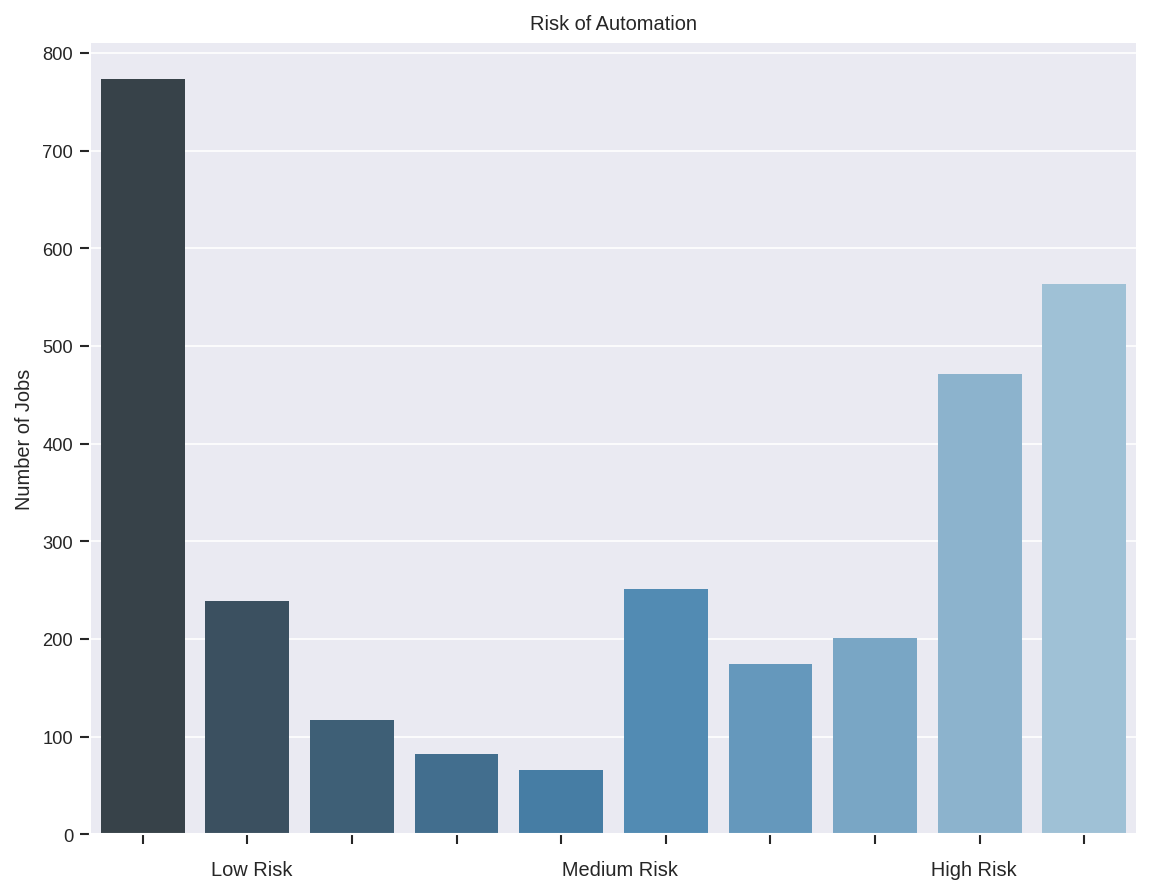

In [ ]:
# This is the bar plot for the entire ESCO job mapping.
import matplotlib
matplotlib.style.use('seaborn-dark')
import seaborn as sns
sns.set_context('paper')
sns.set_style(None)
fig = plt.figure(figsize=(9,7), dpi=150, facecolor=None)
ax1= sns.barplot(y=total_job_count, x= [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], palette="Blues_d")
#plt.locator_params(axis='x', nbins=2)
ax1.set_xticklabels([])
ax1.grid(axis='y')
plt.xlabel('Low Risk                                                 Medium Risk                                              High Risk')
plt.ylabel('Number of Jobs')
plt.title('Risk of Automation')
plt.show()

In [ ]:
import json
from json import JSONEncoder
import numpy

class NumpyArrayEncoder(JSONEncoder):
  def default(self, obj):
    if isinstance(obj, numpy.ndarray):
      return obj.tolist()
    return JSONEncoder.default(self, obj)

data = {'job_proximity': total_job_count}

with open("drive/My Drive/ESCO/Risk_of_automation.json", "w") as write_file:
    json.dump(data, write_file, cls=NumpyArrayEncoder)

In [ ]:
#Create ten groups for the probability values i.e [0,0.1], [0.1,0.2] and so on and count the number of jobs for the same.
total_job_count = []
for i in np.arange(0,1, 0.1):
  #print(i, 0.1+i)
  total_job_count.append(len(threshold_df[(threshold_df['Computerisation Probability']>=i) & (threshold_df['Computerisation Probability']<i+0.1)]))
total_job_count

[491, 166, 68, 53, 37, 122, 116, 119, 302, 309]

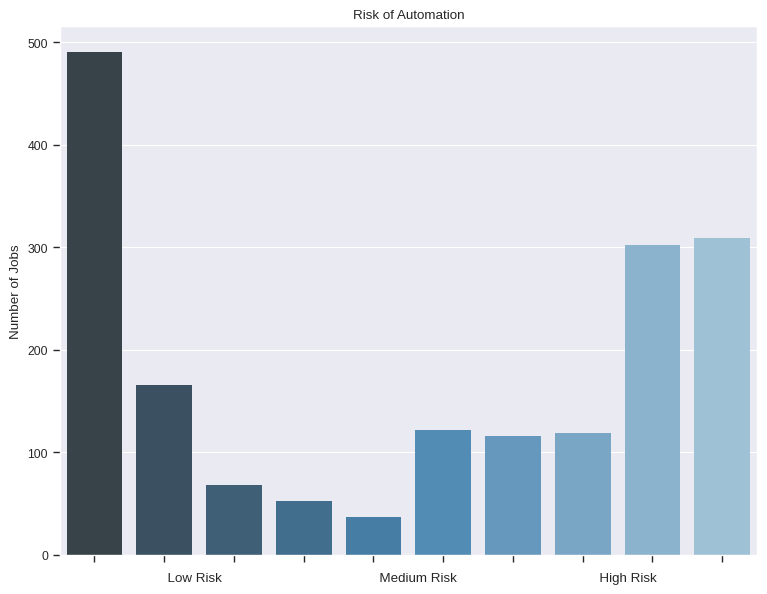

In [ ]:
import seaborn as sn
sns.set_context('paper')
sns.set_style(None)
fig = plt.figure(figsize=(9,7), dpi=100, facecolor=None)
ax = sn.barplot(y=total_job_count, x= [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], palette='Blues_d')
ax.set_xticklabels([])
ax.grid(axis='y')
plt.xlabel('  Low Risk                                          Medium Risk                                      High Risk')
plt.title('Risk of Automation')
plt.ylabel('Number of Jobs')
plt.show()

## **Both the plots for the Threshold and the entire ESCO database matches closely the actual F&O Risk of Automation.**

In [ ]:
final_dat.sort_values('Computerisation Probability', ascending=False, inplace=True, ignore_index=True)

In [ ]:
final_dat.head()

,Job,Computerisation Probability
0,import export specialist in waste and scrap,0.99
1,data entry supervisor,0.99
2,data entry clerk,0.99
3,insurance underwriter,0.99
4,dairy processing operator,0.99


In [ ]:
job_skill_df = pd.read_pickle('drive/My Drive/ESCO/ESCO_JOB_SKILL.pkl')
job_skill_df.head()

,Job,Top Skill,second_best_skill,third_best_skill,fourth_best_skill,fifth_best_skill,sixth_best_skill,seventh_best_skill,eighth_best_skill,ninth_best_skill,tenth_best_skill
0,3D animator,create digital images,create storyboards,create moving images,create 3D environments,create 3D characters,render 3D images,principles of animation,perform scripted dialogue,particle animation,animate 3D organic forms
1,3D modeller,create 3D environments,create 3D characters,animate 3D organic forms,create storyboards,create digital images,render 3D images,create moving images,apply 3D imaging techniques,use CAD for soles,create set models
2,3D printing technician,use CAD for soles,use CAD for heels,use CAD for lasts,operate testbeds,read engineering drawings,create 3D CAD footwear prototypes,maintain library equipment,operate 2D CAD for footwear pattern engineering,design microelectromechanical systems,assist in ship maintenance
3,ATM repair technician,maintain operations of vending machines,provide advice to technicians,use tools for castings repair,maintain mechanical equipment,maintain vehicle service,repair edge banding machinery,maintain water storage equipment,coordinate automotive repair and maintenance s...,repair slitting machinery,maintain water distribution equipment
4,Freinet school teacher,apply Freinet teaching strategies,Freinet teaching principles,Montessori teaching principles,teach teaching principles,apply Montessori teaching strategies,apply teaching strategies,teach dance,adapt teaching to student's capabilities,advise on lesson plans,provide learning support


In [ ]:
df_merg = pd.merge(final_dat, job_skill_df[['Job', 'Top Skill']], how='inner', on='Job')

In [ ]:
df_merg.head()

,Job,Computerisation Probability,Top Skill
0,import export specialist in waste and scrap,0.99,arrange customs inspection
1,data entry supervisor,0.99,manage dispatch software systems;
2,data entry clerk,0.99,meet deadlines for preparing legal cases
3,insurance underwriter,0.99,provide information on properties
4,dairy processing operator,0.99,tend dairy processing machines


In [ ]:
df_merg.tail()

,Job,Computerisation Probability,Top Skill
2937,mental health social worker,0.0031,assist psychologist
2938,art therapist,0.0028,treat medical conditions with art therapy
2939,sport therapist,0.0028,plan physical rehabilitation of animals
2940,alternative animal therapist,0.0028,energy therapy
2941,recreational therapist,0.0028,apply techniques of occupational therapy


In [ ]:
highrisk_word = pd.Series(' '.join(df_merg['Top Skill'][0:500]).lower().split()).value_counts()
highrisk_word

of           39
manage       34
in           30
for          25
operate      23
             ..
towards       1
plastic       1
nuclear       1
construct     1
actors        1
Length: 770, dtype: int64

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
s = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
top_words = {}
top_words['word']=[]
top_words['count']=[]
for idx,y in highrisk_word.iteritems():
  if idx not in s:
    top_words['word'].append(idx)
    top_words['count'].append(y)

In [ ]:
lowrisk_word = pd.Series(' '.join(df_merg['Top Skill'][-500:-1]).lower().split()).value_counts()

In [ ]:
lowr_topwords = {}
lowr_topwords['word']=[]
lowr_topwords['count']=[]
for idx,y in lowrisk_word.iteritems():
  if idx not in s:
    lowr_topwords['word'].append(idx)
    lowr_topwords['count'].append(y)

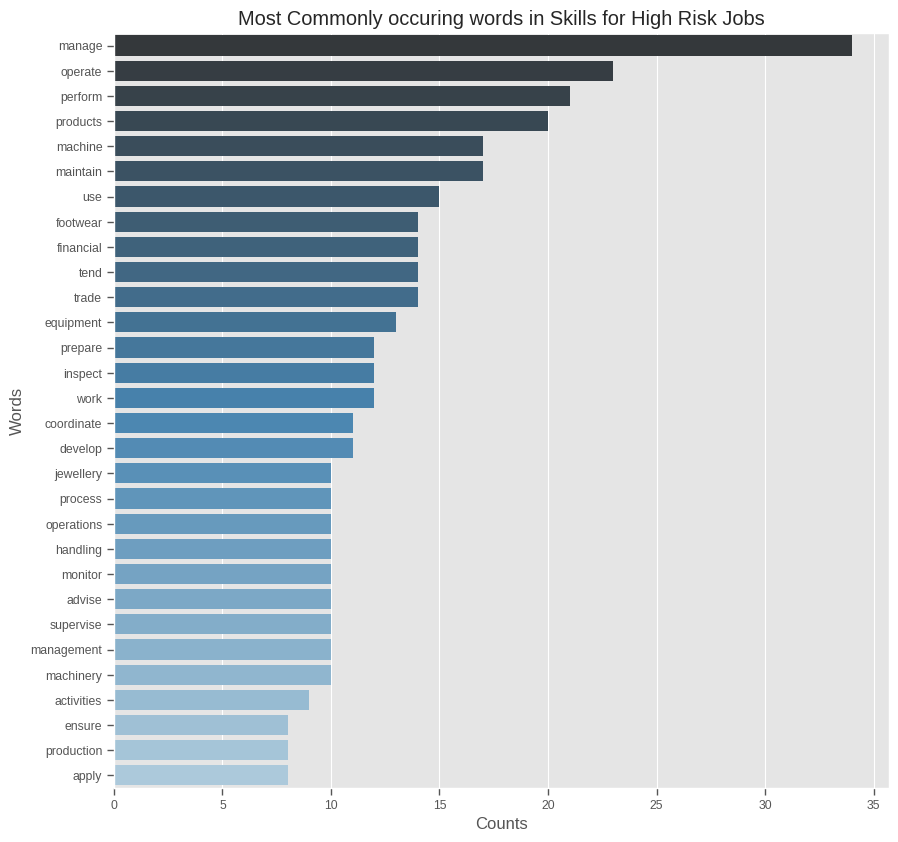

In [ ]:
import matplotlib
matplotlib.style.use('ggplot')
plt.figure(figsize=(10,10), dpi=100)
sns.barplot(orient='h', y=top_words['word'][0:30], x=top_words['count'][0:30], palette="Blues_d")
plt.ylabel('Words')
plt.xlabel('Counts')
plt.title('Most Commonly occuring words in Skills for High Risk Jobs')
plt.show()

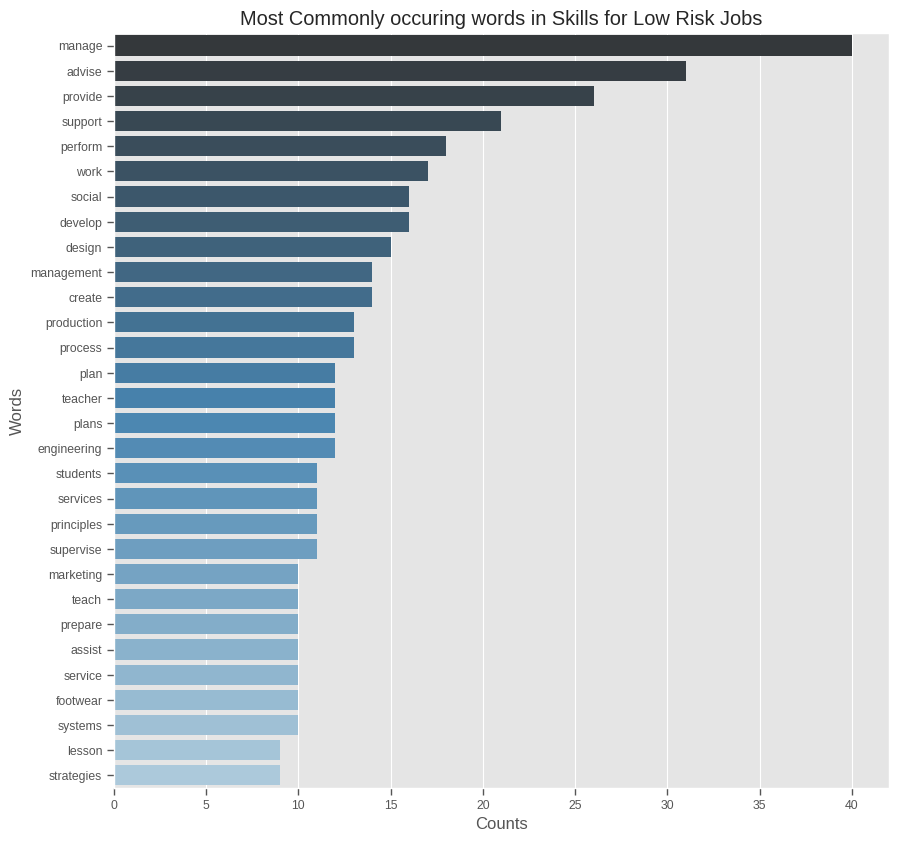

In [ ]:
import matplotlib
matplotlib.style.use('ggplot')
plt.figure(figsize=(10,10), dpi=100)
sns.barplot(orient='h', y=lowr_topwords['word'][0:30], x=lowr_topwords['count'][0:30], palette="Blues_d")
plt.ylabel('Words')
plt.xlabel('Counts')
plt.title('Most Commonly occuring words in Skills for Low Risk Jobs')
plt.show()

In [ ]:
import json
with open('drive/My Drive/ESCO/raw_clustered_esco_job.json') as f:
   data = json.load(f)
cluster_df = pd.DataFrame(data)
cluster_df.head()

,Job,Labels
0,3D animator,435
1,3D modeller,435
2,3D printing technician,173
3,ATM repair technician,183
4,Freinet school teacher,12


In [ ]:
cluster_df.tail()

,Job,Labels
2937,zoo educator,241
2938,zoo registrar,241
2939,zoo section leader,241
2940,zookeeper,241
2941,zoology technician,209


In [ ]:
cluster_df['Labels'].nunique()

500

In [ ]:
job_encoded = embed(cluster_df['Job'])
from sklearn.manifold import TSNE
model = TSNE(n_components=2, metric='euclidean', random_state=0)
red_job_encoded = model.fit_transform(job_encoded)

In [ ]:
print(red_job_encoded[:,0])
print(red_job_encoded[:,1])
red_job_encoded

[-44.946392  -45.035767   -3.7361958 ...  40.05213    39.543568
   2.3864634]
[-24.448174  -23.763819   25.454203  ... -36.028263  -34.8884
   1.5783771]


array([[-44.946392 , -24.448174 ],
       [-45.035767 , -23.763819 ],
       [ -3.7361958,  25.454203 ],
       ...,
       [ 40.05213  , -36.028263 ],
       [ 39.543568 , -34.8884   ],
       [  2.3864634,   1.5783771]], dtype=float32)

In [ ]:
encoded_df = pd.DataFrame(red_job_encoded, columns=['dim_1', 'dim_2'])
encoded_df['Labels'] = cluster_df['Labels'].values.tolist()
encoded_df

,dim_1,dim_2,Labels
0,-44.946392,-24.448174,435
1,-45.035767,-23.763819,435
2,-3.736196,25.454203,173
3,12.121161,29.326252,183
4,26.256868,-60.988995,12
...,...,...,...
2937,39.625336,-35.882431,241
2938,39.477547,-36.172077,241
2939,40.052132,-36.028263,241
2940,39.543568,-34.888401,241


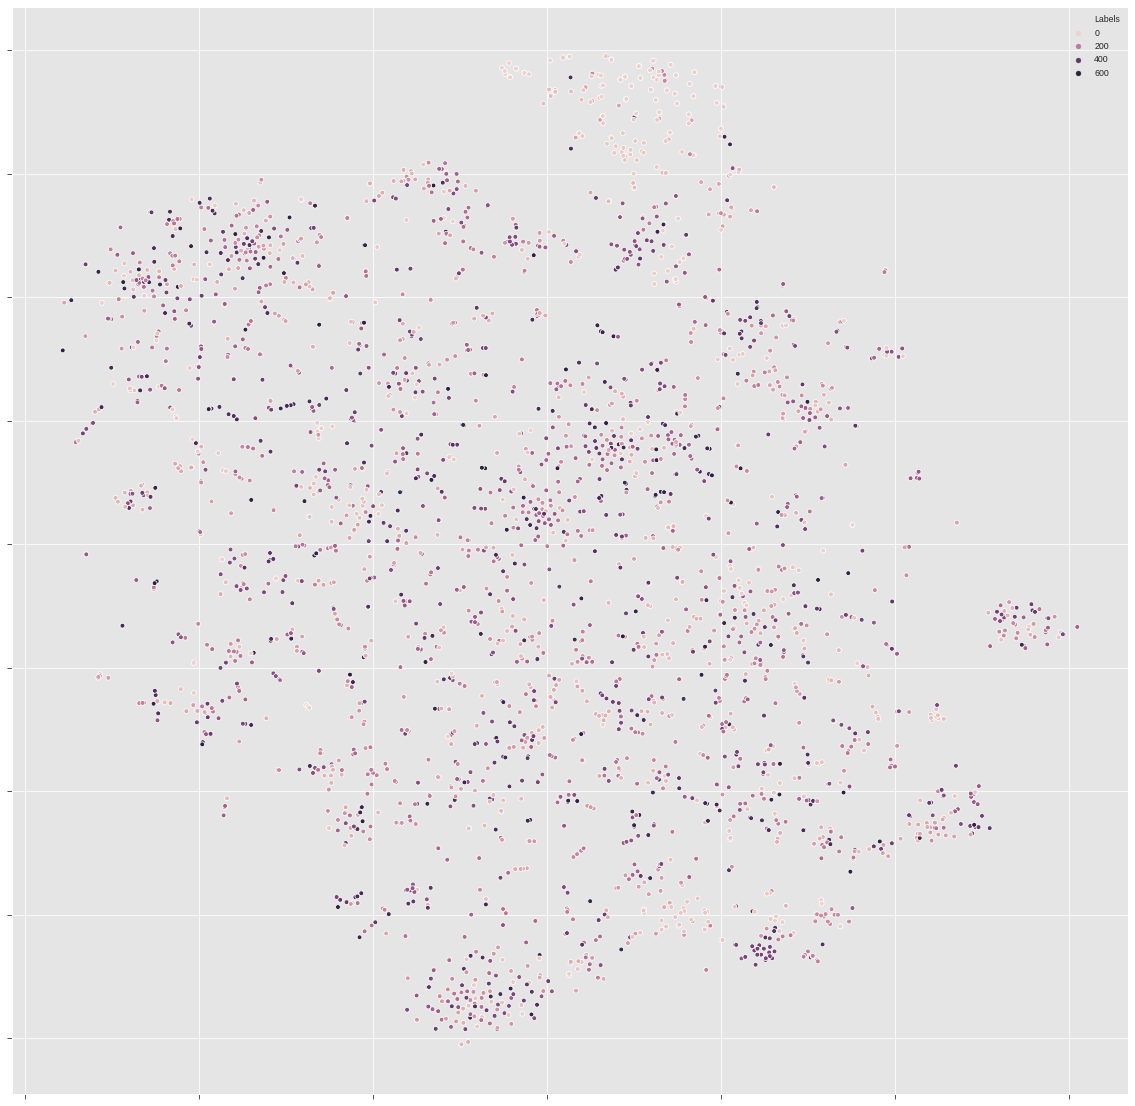

In [ ]:
plt.figure(figsize=(20, 20))
sns.set_context('paper')
matplotlib.style.use('ggplot')
#sns.palplot(sns.color_palette("BrBG", 500))
ax = sns.scatterplot(x=encoded_df['dim_1'], y=encoded_df['dim_2'], hue=encoded_df['Labels'])# , palette='BrBG')
plt.xlabel('')
plt.ylabel('')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()
#plt.savefig('drive/My Drive/ESCO/cluster.jpg')#, dpi=300)

In [ ]:
job_family = ["Architecture and Engineering",
 "Arts, Design, Entertainment, Sports, and Media",
 "Building and Grounds Cleaning and Maintenance",
 "Business and Financial",
 "Community and Social Service",
 "Computer and Mathematical",
 "Construction and Extraction",
 "Education, Training, and Library",
 "Farming, Fishing, and Forestry",
 "Food Preparation and Serving",
 "Healthcare Practitioners and Technical",
 "Healthcare Support",
 "Installation, Maintenance, and Repair",
 "Legal", 
 "Life, Physical, and Social Science",
 "Management",
 "Military Specific",
 "Office and Administrative Support",
 "Personal Care and Service",
 "Production",
 "Protective Service",
 "Sales and Related",
 "Transportation Material Moving"]

In [ ]:
len(job_family)

23

In [ ]:
job_family = [i.replace('and ', '') for i in job_family ]
job_family = [i.replace(',', '') for i in job_family ]

In [ ]:
job_family_encoded = embed(job_family)

In [ ]:
job_family_encoded.shape

TensorShape([23, 512])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


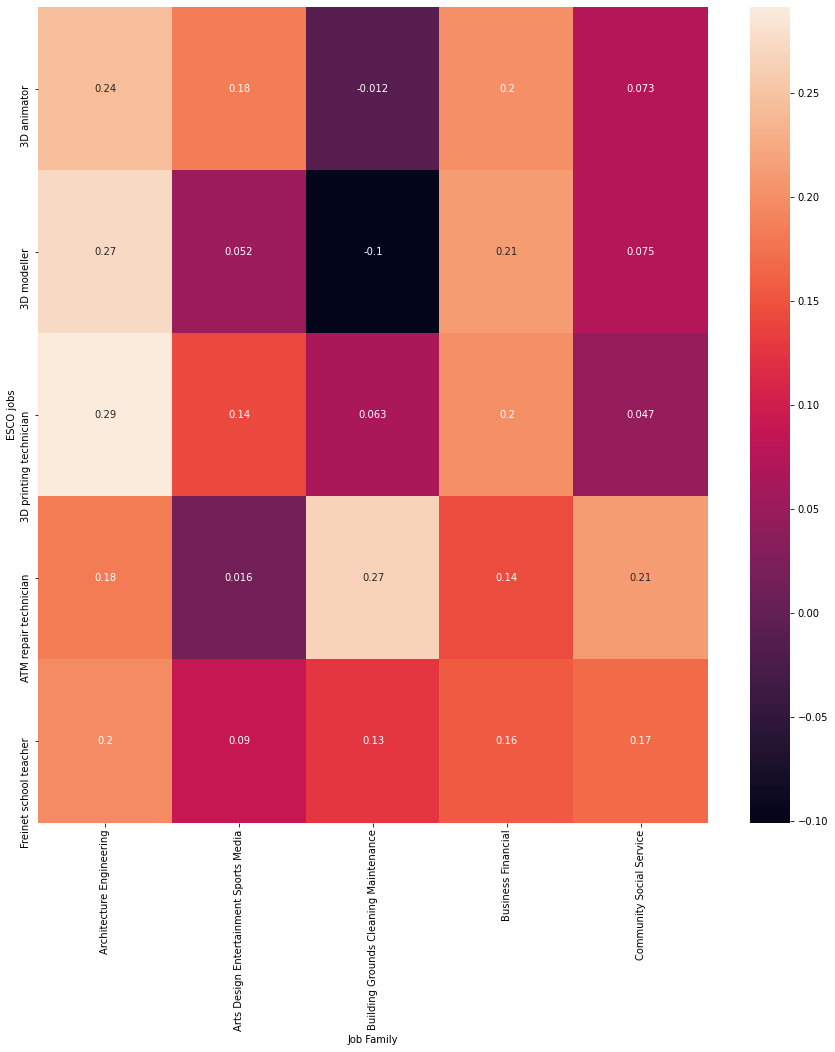

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
job_family_similarity_matrix = cosine_similarity(esco_job_encoded, job_family_encoded, dense_output=True)
plt.figure(figsize=(15,15))
sns.heatmap(job_family_similarity_matrix[0:5, 0:5], annot=True, xticklabels=job_family[0:5], yticklabels=df.loc[0:4]['Job'])
plt.xlabel('Job Family')
plt.ylabel('ESCO jobs')
plt.show()

In [ ]:
job_family = pd.DataFrame(job_family)

In [ ]:
job_family.rename(columns={0:'Job Family'}, inplace=True)
job_family

,Job Family
0,Architecture Engineering
1,Arts Design Entertainment Sports Media
2,Building Grounds Cleaning Maintenance
3,Business Financial
4,Community Social Service
5,Computer Mathematical
6,Construction Extraction
7,Education Training Library
8,Farming Fishing Forestry
9,Food Preparation Serving


In [ ]:
family_df = pd.DataFrame({'Job': df['Job'],
                          'Family': job_family.loc[np.argmax(job_family_similarity_matrix, axis=1)]['Job Family'].values})
family_df.head()
                

,Job,Family
0,3D animator,Computer Mathematical
1,3D modeller,Construction Extraction
2,3D printing technician,Construction Extraction
3,ATM repair technician,Installation Maintenance Repair
4,Freinet school teacher,Education Training Library


In [ ]:

family_df = pd.merge(family_df, final_dat, how='inner', on='Job', )
family_df

,Job,Family,Computerisation Probability
0,3D animator,Computer Mathematical,0.015
1,3D modeller,Construction Extraction,0.970
2,3D printing technician,Construction Extraction,0.970
3,ATM repair technician,Installation Maintenance Repair,0.810
4,Freinet school teacher,Education Training Library,0.130
...,...,...,...
2937,zoo educator,Education Training Library,0.130
2938,zoo registrar,Office Administrative Support,0.300
2939,zoo section leader,Education Training Library,0.100
2940,zookeeper,Management,0.300


In [ ]:
family_df.to_json('drive/My Drive/Job_Family_Risk.json')

In [ ]:
mean = family_df.groupby('Family')['Computerisation Probability'].mean()

In [ ]:
mean

Family
Architecture Engineering                  0.264022
Arts Design Entertainment Sports Media    0.331874
Building Grounds Cleaning Maintenance     0.740410
Business Financial                        0.494692
Community Social Service                  0.159205
Computer Mathematical                     0.345518
Construction Extraction                   0.759340
Education Training Library                0.354955
Farming Fishing Forestry                  0.579791
Food Preparation Serving                  0.671972
Healthcare Practitioners Technical        0.467733
Healthcare Support                        0.333115
Installation Maintenance Repair           0.645746
Legal                                     0.644907
Life Physical Social Science              0.173896
Management                                0.349140
Military Specific                         0.449838
Office Administrative Support             0.467381
Personal Care Service                     0.465237
Production              

In [ ]:
job_family['Mean Automation Risk']= mean.values.tolist()
job_family.sort_values('Mean Automation Risk',ascending=False, inplace=True)
job_family

,Job Family,Mean Automation Risk
6,Construction Extraction,0.759340
2,Building Grounds Cleaning Maintenance,0.740410
9,Food Preparation Serving,0.671972
22,Transportation Material Moving,0.656594
12,Installation Maintenance Repair,0.645746
13,Legal,0.644907
20,Protective Service,0.610155
8,Farming Fishing Forestry,0.579791
21,Sales Related,0.512643
19,Production,0.510875


In [ ]:
job_family.to_json('drive/My Drive/ESCO/mean_automation_per_family.json')

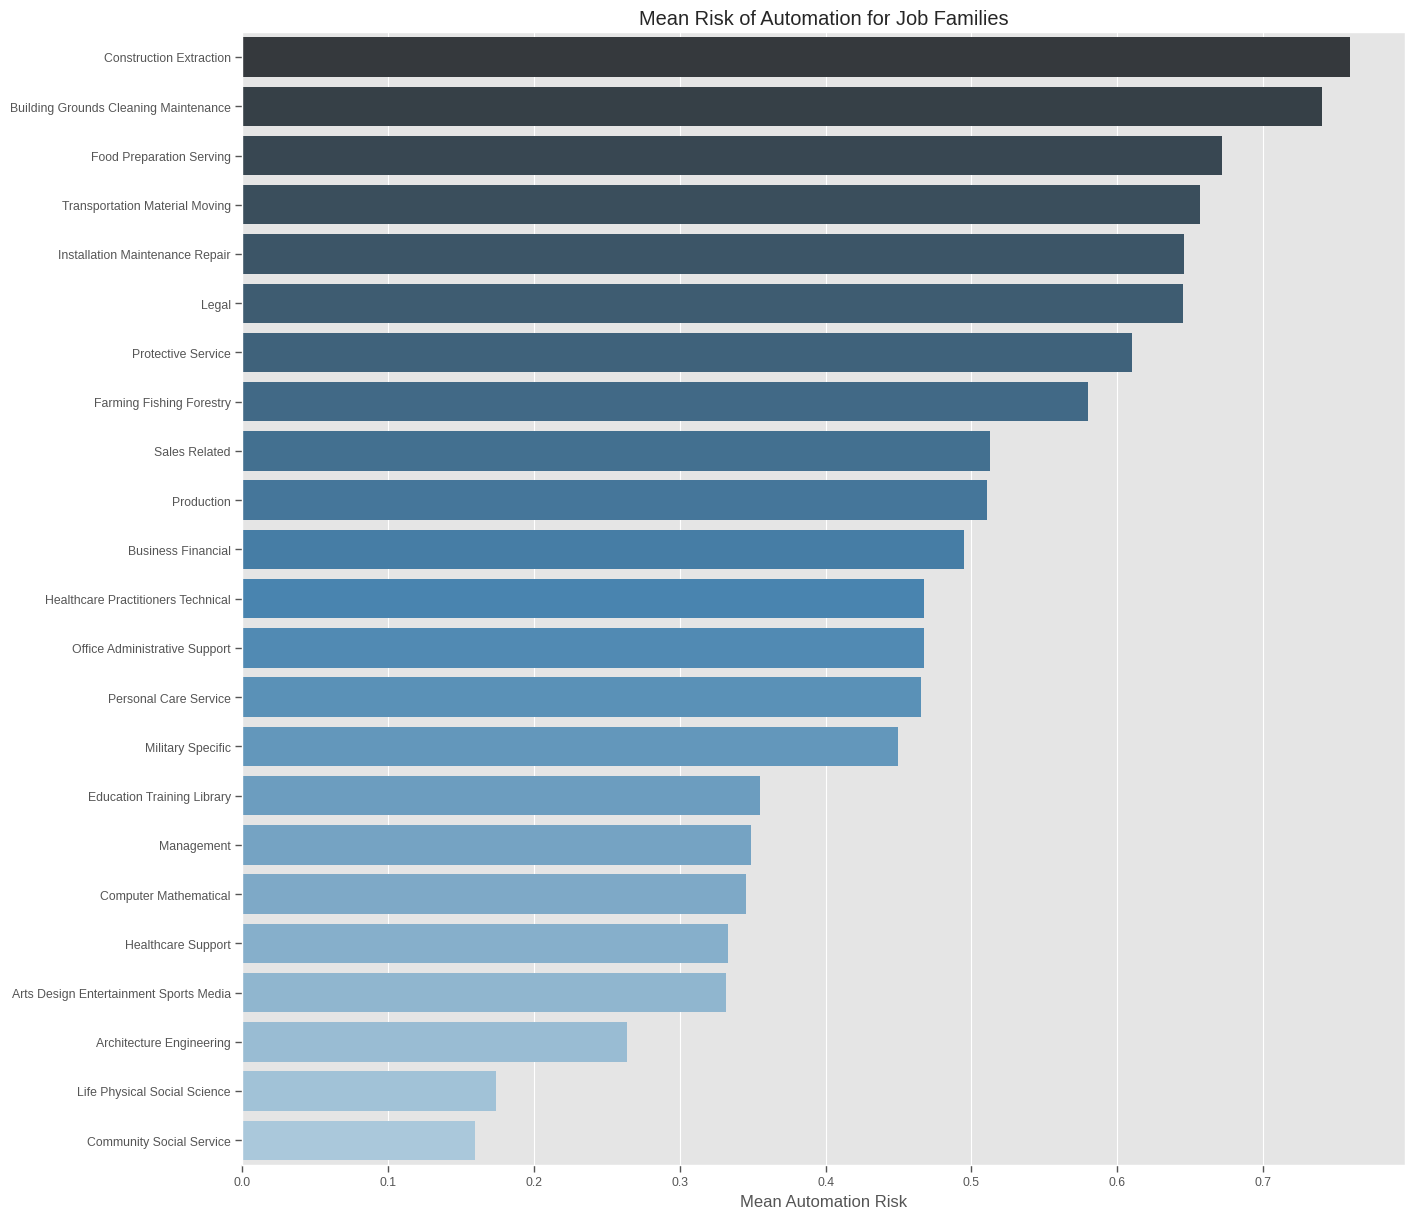

In [ ]:
import matplotlib
matplotlib.style.use('ggplot')
plt.figure(figsize=(15,15), dpi=100)
sns.barplot(orient='h', y=job_family['Job Family'].values.tolist(), x=job_family['Mean Automation Risk'].values.tolist(), palette="Blues_d")
#plt.ylabel('Job Family')
plt.xlabel('Mean Automation Risk')
plt.title('Mean Risk of Automation for Job Families')
plt.show()

In [ ]:
job_family = ["Architecture and Engineering",
 "Arts, Design, Entertainment, Sports, and Media",
 "Building and Grounds Cleaning and Maintenance",
 "Business and Financial",
 "Community and Social Service",
 "Computer and Mathematical",
 "Construction and Extraction",
 "Education, Training, and Library",
 "Farming, Fishing, and Forestry",
 "Food Preparation and Serving",
 "Healthcare Practitioners and Technical",
 "Healthcare Support",
 "Installation, Maintenance, and Repair",
 "Legal",
 "Life, Physical, and Social Science",
 "Management",
 "Military Specific",
 "Office and Administrative Support",
 "Personal Care and Service",
 "Production",
 "Protective Service",
 "Sales and Related",
 "Transportation Material Moving"]

In [ ]:
job_family = [i.replace('and ', '') for i in job_family ]
job_family = [i.replace(',', '') for i in job_family ]
count = dict((i, 0) for i in job_family)
count

{'Architecture Engineering': 0,
 'Arts Design Entertainment Sports Media': 0,
 'Building Grounds Cleaning Maintenance': 0,
 'Business Financial': 0,
 'Community Social Service': 0,
 'Computer Mathematical': 0,
 'Construction Extraction': 0,
 'Education Training Library': 0,
 'Farming Fishing Forestry': 0,
 'Food Preparation Serving': 0,
 'Healthcare Practitioners Technical': 0,
 'Healthcare Support': 0,
 'Installation Maintenance Repair': 0,
 'Legal': 0,
 'Life Physical Social Science': 0,
 'Management': 0,
 'Military Specific': 0,
 'Office Administrative Support': 0,
 'Personal Care Service': 0,
 'Production': 0,
 'Protective Service': 0,
 'Sales Related': 0,
 'Transportation Material Moving': 0}

In [ ]:
family_df

NameError: ignored

In [ ]:
pd.to_pickle(family_df, 'drive/My Drive/ESCO/Job_Industry_Automation_risk.pkl')

In [ ]:
def percent_count(row):
  val = row['Computerisation Probability']
  if val>0.6:
    count[row['Family']]+=1
  return 

high_risk_family_count = family_df.apply(percent_count, axis=1)
count

{'Architecture Engineering': 61,
 'Arts Design Entertainment Sports Media': 17,
 'Building Grounds Cleaning Maintenance': 57,
 'Business Financial': 48,
 'Community Social Service': 6,
 'Computer Mathematical': 17,
 'Construction Extraction': 306,
 'Education Training Library': 43,
 'Farming Fishing Forestry': 151,
 'Food Preparation Serving': 113,
 'Healthcare Practitioners Technical': 76,
 'Healthcare Support': 16,
 'Installation Maintenance Repair': 98,
 'Legal': 19,
 'Life Physical Social Science': 4,
 'Management': 57,
 'Military Specific': 22,
 'Office Administrative Support': 27,
 'Personal Care Service': 40,
 'Production': 81,
 'Protective Service': 62,
 'Sales Related': 59,
 'Transportation Material Moving': 30}

### **HIGH RISK ARE JOBS WITH GREATER THAN 0.6 RISK OF AUTOMATION**

In [ ]:
total_job_by_family = dict(family_df.groupby('Family')['Job'].count())

In [ ]:
total_job_by_family

{'Architecture Engineering': 268,
 'Arts Design Entertainment Sports Media': 77,
 'Building Grounds Cleaning Maintenance': 72,
 'Business Financial': 123,
 'Community Social Service': 59,
 'Computer Mathematical': 73,
 'Construction Extraction': 371,
 'Education Training Library': 143,
 'Farming Fishing Forestry': 274,
 'Food Preparation Serving': 155,
 'Healthcare Practitioners Technical': 163,
 'Healthcare Support': 60,
 'Installation Maintenance Repair': 153,
 'Legal': 29,
 'Life Physical Social Science': 47,
 'Management': 190,
 'Military Specific': 60,
 'Office Administrative Support': 69,
 'Personal Care Service': 101,
 'Production': 148,
 'Protective Service': 109,
 'Sales Related': 149,
 'Transportation Material Moving': 49}

In [ ]:
percent = [count[key]/total_job_by_family[key]*100 for key in count.keys()]

In [ ]:
percent

[22.761194029850746,
 22.07792207792208,
 79.16666666666666,
 39.02439024390244,
 10.16949152542373,
 23.28767123287671,
 82.47978436657682,
 30.069930069930066,
 55.1094890510949,
 72.90322580645162,
 46.62576687116564,
 26.666666666666668,
 64.05228758169935,
 65.51724137931035,
 8.51063829787234,
 30.0,
 36.666666666666664,
 39.130434782608695,
 39.603960396039604,
 54.729729729729726,
 56.88073394495413,
 39.59731543624161,
 61.224489795918366]

In [ ]:
percent_df = pd.DataFrame({'Job Family': list(count.keys()),
                           'Percentage': percent})
percent_df.sort_values('Percentage', ascending=False, inplace=True)

In [ ]:
percent_df

,Job Family,Percentage
6,Construction Extraction,82.479784
2,Building Grounds Cleaning Maintenance,79.166667
9,Food Preparation Serving,72.903226
13,Legal,65.517241
12,Installation Maintenance Repair,64.052288
22,Transportation Material Moving,61.224490
20,Protective Service,56.880734
8,Farming Fishing Forestry,55.109489
19,Production,54.729730
10,Healthcare Practitioners Technical,46.625767


In [ ]:
percent_df.to_json('drive/My Drive/ESCO/percentage_job_family.json')

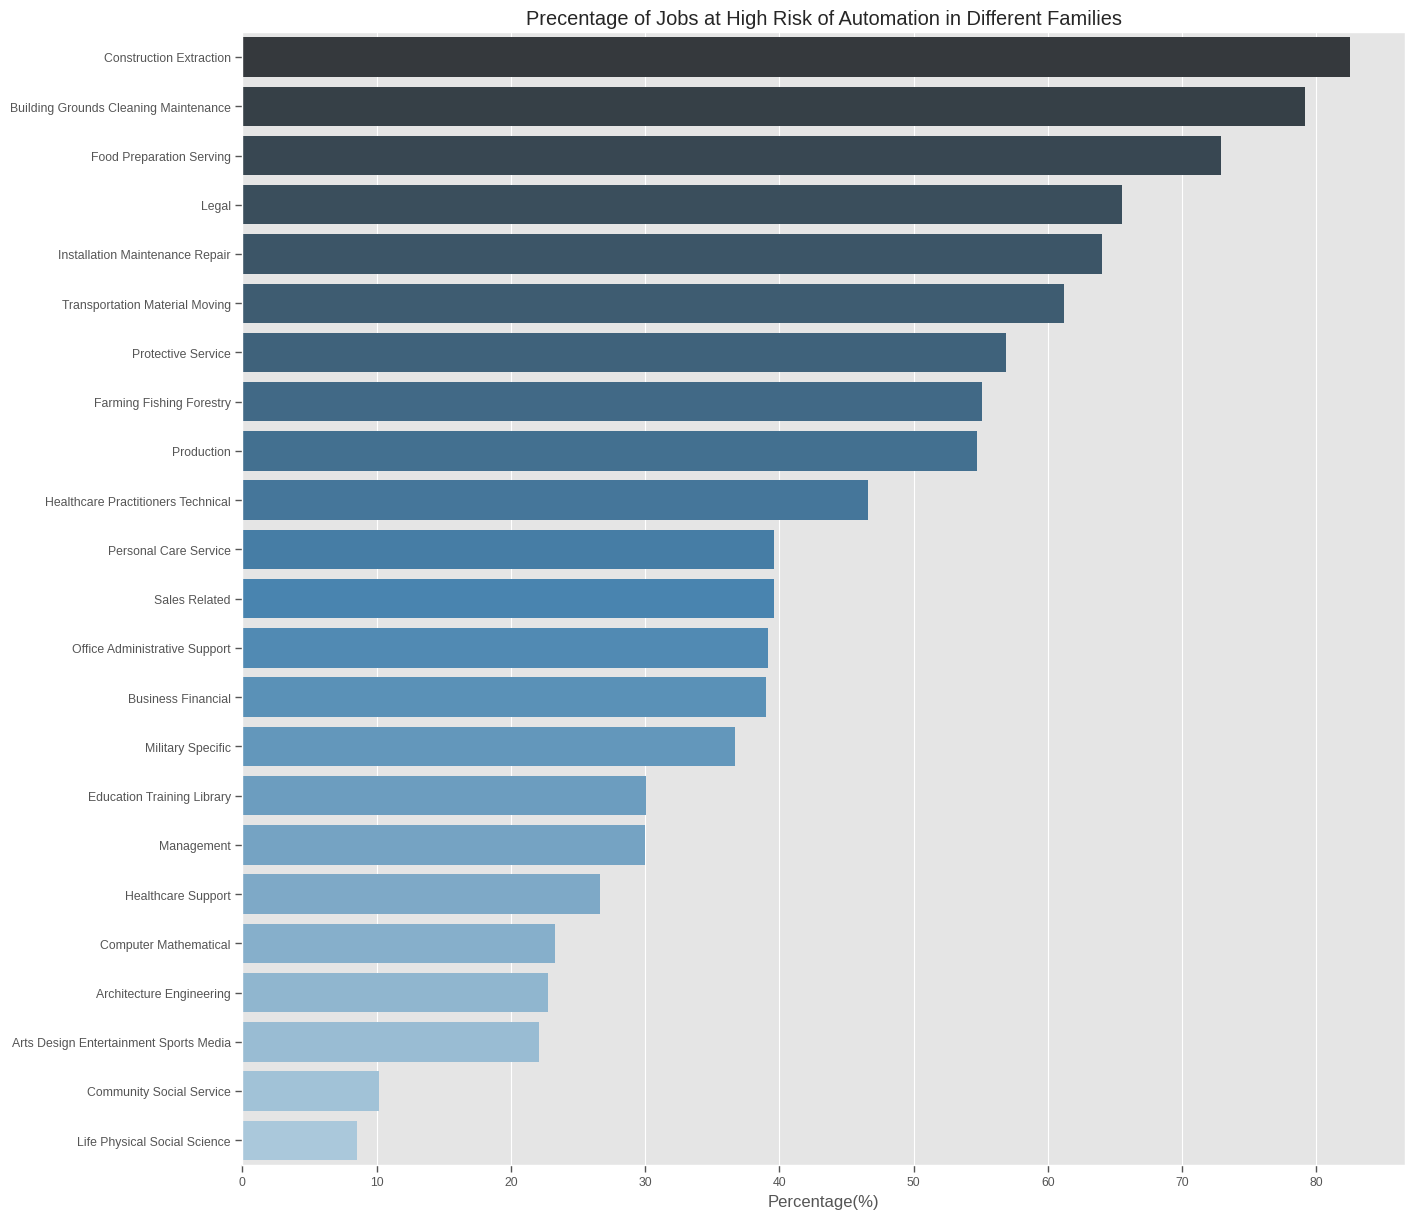

In [ ]:
import matplotlib
matplotlib.style.use('ggplot')
plt.figure(figsize=(15,15), dpi=100)
sns.barplot(orient='h', y=percent_df['Job Family'].values.tolist(), x=percent_df['Percentage'].values.tolist(), palette="Blues_d")
#plt.ylabel('Job Family')
plt.xlabel('Percentage(%)')
plt.title('Precentage of Jobs at High Risk of Automation in Different Families')
plt.show()

In [ ]:
import json

In [ ]:
import pandas as pd
JOB_SKILL = pd.read_pickle('drive/My Drive/ESCO/ESCO_JOB_SKILL.pkl')

In [ ]:
JOB_SKILL['Skills'] = JOB_SKILL['Top Skill'] + ', ' + JOB_SKILL['second_best_skill'] + ', ' + JOB_SKILL['third_best_skill']
JOB_SKILL.head()

,Job,Top Skill,second_best_skill,third_best_skill,fourth_best_skill,fifth_best_skill,sixth_best_skill,seventh_best_skill,eighth_best_skill,ninth_best_skill,tenth_best_skill,Skills
0,3D animator,create digital images,create storyboards,create moving images,create 3D environments,create 3D characters,render 3D images,principles of animation,perform scripted dialogue,particle animation,animate 3D organic forms,"create digital images, create storyboards, cre..."
1,3D modeller,create 3D environments,create 3D characters,animate 3D organic forms,create storyboards,create digital images,render 3D images,create moving images,apply 3D imaging techniques,use CAD for soles,create set models,"create 3D environments, create 3D characters, ..."
2,3D printing technician,use CAD for soles,use CAD for heels,use CAD for lasts,operate testbeds,read engineering drawings,create 3D CAD footwear prototypes,maintain library equipment,operate 2D CAD for footwear pattern engineering,design microelectromechanical systems,assist in ship maintenance,"use CAD for soles, use CAD for heels, use CAD ..."
3,ATM repair technician,maintain operations of vending machines,provide advice to technicians,use tools for castings repair,maintain mechanical equipment,maintain vehicle service,repair edge banding machinery,maintain water storage equipment,coordinate automotive repair and maintenance s...,repair slitting machinery,maintain water distribution equipment,"maintain operations of vending machines, provi..."
4,Freinet school teacher,apply Freinet teaching strategies,Freinet teaching principles,Montessori teaching principles,teach teaching principles,apply Montessori teaching strategies,apply teaching strategies,teach dance,adapt teaching to student's capabilities,advise on lesson plans,provide learning support,"apply Freinet teaching strategies, Freinet tea..."


In [ ]:
job_skill_top3_combined = JOB_SKILL[['Skills', 'Job']]

In [ ]:
job_skill_top3_combined.head()

,Skills,Job
0,"create digital images, create storyboards, cre...",3D animator
1,"create 3D environments, create 3D characters, ...",3D modeller
2,"use CAD for soles, use CAD for heels, use CAD ...",3D printing technician
3,"maintain operations of vending machines, provi...",ATM repair technician
4,"apply Freinet teaching strategies, Freinet tea...",Freinet school teacher


In [ ]:
job_skill_top3_combined.to_json('drive/My Drive/ESCO/job_skill_top3_combined.json')

In [ ]:
df_job_family_risk = pd.read_json('drive/My Drive/ESCO/Job_Family_Risk.json')
df_job_family_risk.head()

,Job,Family,Computerisation Probability
0,3D animator,Computer Mathematical,0.015
1,3D modeller,Construction Extraction,0.970
2,3D printing technician,Construction Extraction,0.970
3,ATM repair technician,Installation Maintenance Repair,0.810
4,Freinet school teacher,Education Training Library,0.130


In [ ]:
#Create ten groups for the probability values i.e [0,0.1], [0.1,0.2] and so on and count the number of jobs for the same.
total_job_count = []
for i in np.arange(0, 1, 0.05):
  i = np.around(i,2)
  total_job_count.append(df_job_family_risk[(df_job_family_risk['Computerisation Probability']>=i) & (df_job_family_risk['Computerisation Probability']<i+0.05)].shape[0])
total_job_count

[639,
 134,
 194,
 67,
 44,
 59,
 28,
 68,
 32,
 34,
 122,
 129,
 56,
 98,
 113,
 112,
 205,
 310,
 241,
 323]

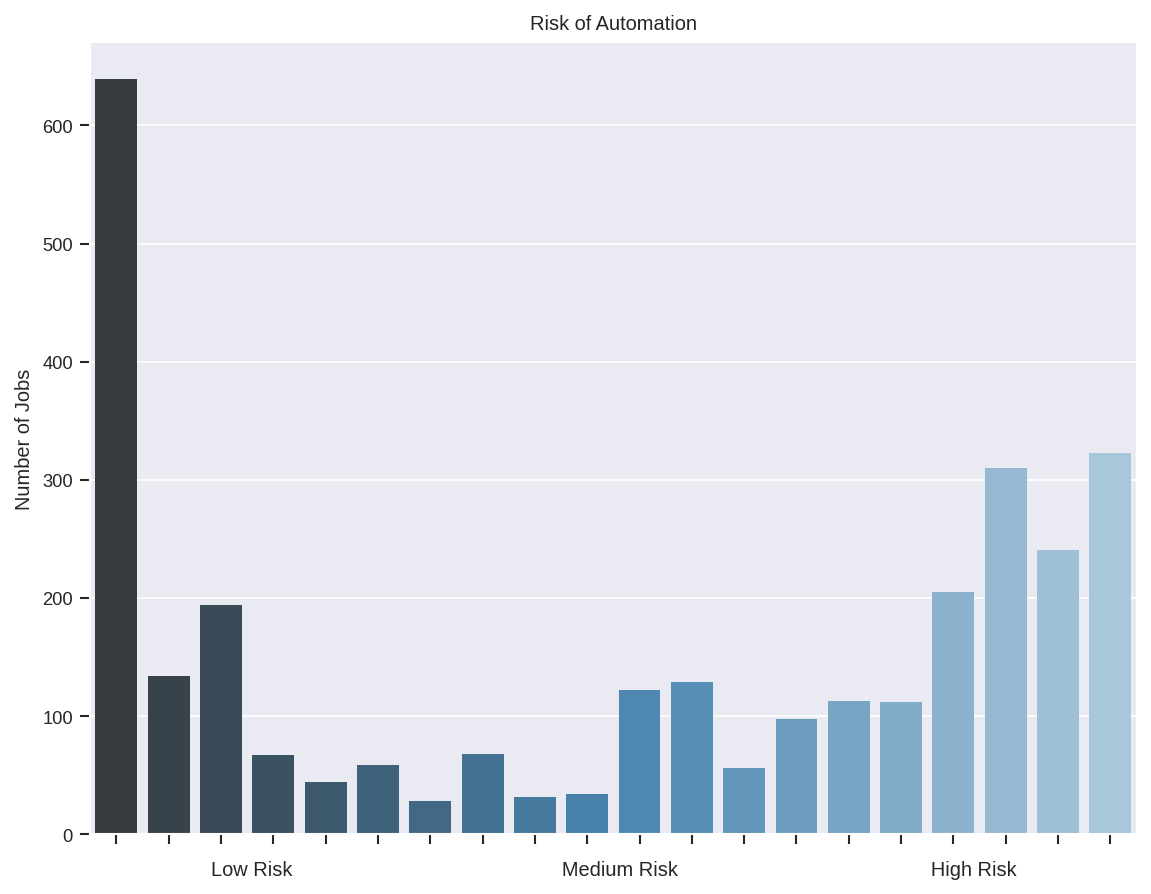

In [ ]:
# This is the bar plot for the entire ESCO job mapping.
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('seaborn-dark')
import seaborn as sns
sns.set_context('paper')
sns.set_style(None)
fig = plt.figure(figsize=(9,7), dpi=150, facecolor=None)
ax1= sns.barplot(y=total_job_count, x= np.linspace(0,1.,20,endpoint=False), palette="Blues_d")
#plt.locator_params(axis='x', nbins=2)
ax1.set_xticklabels([])
ax1.grid(axis='y')
plt.xlabel('Low Risk                                                 Medium Risk                                              High Risk')
plt.ylabel('Number of Jobs')
plt.title('Risk of Automation')
plt.show()

In [ ]:
np.linspace(0,1,20,endpoint=False)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [ ]:
np.sum(total_job_count)

3008

In [ ]:
len(df_job_family_risk)

2942

In [ ]:
0.015>0.05

False

In [ ]:
df_job_family_risk[(df_job_family_risk['Computerisation Probability']>=i) & (df_job_family_risk['Computerisation Probability']<i+0.05)].shape[0]

323

In [ ]:
import json
from json import JSONEncoder
import numpy

class NumpyArrayEncoder(JSONEncoder):
  def default(self, obj):
    if isinstance(obj, numpy.ndarray):
      return obj.tolist()
    return JSONEncoder.default(self, obj)

data = {'Risk of Automation': total_job_count}

with open("drive/My Drive/ESCO/Risk_of_automation02.json", "w") as write_file:
    json.dump(data, write_file, cls=NumpyArrayEncoder)

In [ ]:
df_job_family_risk.head()

,Job,Family,Computerisation Probability
0,3D animator,Computer Mathematical,0.015
1,3D modeller,Construction Extraction,0.970
2,3D printing technician,Construction Extraction,0.970
3,ATM repair technician,Installation Maintenance Repair,0.810
4,Freinet school teacher,Education Training Library,0.130


In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
model = [KMeans(n_clusters=i+1, verbose=True, random_state=0) for i in range(30)]
fitted = [model.fit(np.reshape(np.asarray(df_job_family_risk['Computerisation Probability'].values), (-1,1))) for model in model]
err = [model.inertia_ for model in model]

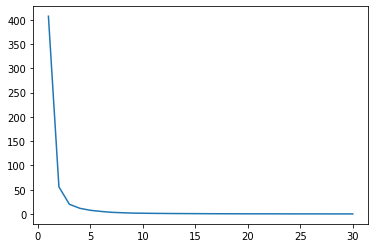

In [ ]:
import matplotlib.pyplot as plt
plt.plot([i+1 for i in range(30)], err)
plt.show()

In [ ]:
model = KMeans(n_clusters=10, random_state=0, verbose=False)
labels = model.fit_predict(np.reshape(np.asarray(df_job_family_risk['Computerisation Probability'].values), (-1,1)))
labels

array([0, 3, 3, ..., 8, 4, 1], dtype=int32)

In [ ]:
plt.scatter(np.reshape(np.asarray(df_job_family_risk['Computerisation Probability'].values), (-1,1)), )

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [ ]:
df_job_family_risk['Labels'] = labels
df_job_family_risk.head()

,Job,Family,Computerisation Probability,Labels
0,3D animator,Computer Mathematical,0.015,0
1,3D modeller,Construction Extraction,0.970,3
2,3D printing technician,Construction Extraction,0.970,3
3,ATM repair technician,Installation Maintenance Repair,0.810,1
4,Freinet school teacher,Education Training Library,0.130,8


In [ ]:
df_job_family_risk.groupby('Family')['Computerisation Probability'].min()

Family
Architecture Engineering                  0.0042
Arts Design Entertainment Sports Media    0.0042
Building Grounds Cleaning Maintenance     0.0055
Business Financial                        0.0041
Community Social Service                  0.0028
Computer Mathematical                     0.0065
Construction Extraction                   0.0042
Education Training Library                0.0042
Farming Fishing Forestry                  0.0042
Food Preparation Serving                  0.0039
Healthcare Practitioners Technical        0.0035
Healthcare Support                        0.0028
Installation Maintenance Repair           0.0042
Legal                                     0.0033
Life Physical Social Science              0.0031
Management                                0.0040
Military Specific                         0.0035
Office Administrative Support             0.0028
Personal Care Service                     0.0035
Production                                0.0033
Protective Se

In [ ]:
df_job_family_risk.groupby('Family')['Computerisation Probability'].max()

Family
Architecture Engineering                  0.98
Arts Design Entertainment Sports Media    0.98
Building Grounds Cleaning Maintenance     0.97
Business Financial                        0.99
Community Social Service                  0.97
Computer Mathematical                     0.99
Construction Extraction                   0.99
Education Training Library                0.99
Farming Fishing Forestry                  0.99
Food Preparation Serving                  0.99
Healthcare Practitioners Technical        0.99
Healthcare Support                        0.99
Installation Maintenance Repair           0.99
Legal                                     0.98
Life Physical Social Science              0.97
Management                                0.99
Military Specific                         0.98
Office Administrative Support             0.99
Personal Care Service                     0.99
Production                                0.99
Protective Service                        0.99
Sales 

In [ ]:
df_job_family_risk.to_json('drive/My Drive/ESCO/Automation_cluster.json')